In [23]:
import joblib

# Logistic Regression

In [24]:
log_reg_first_ver = joblib.load("Models/default_log_reg_first_ver.pkl") 

In [25]:
import numpy as np

X_train = np.genfromtxt("Data/X_train.csv", delimiter=',')
y_train = np.genfromtxt("Data/y_train.csv", delimiter=',')

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cross_val_score(log_reg_first_ver, X_train, y_train, cv=3, scoring="accuracy")

array([0.77695749, 0.78277405, 0.77293065])

In [28]:
from sklearn.model_selection import cross_val_predict

In [29]:
y_train_pred = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3)

In [30]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [31]:
confusion_matrix(y_train, y_train_pred)

array([[9259,  822],
       [2161, 1168]], dtype=int64)

In [32]:
precision_score(y_train, y_train_pred)

0.5869346733668341

In [33]:
recall_score(y_train, y_train_pred)

0.3508561129468309

In [34]:
from sklearn.metrics import f1_score

In [35]:
f1_score(y_train, y_train_pred)

0.43918029704831735

In [36]:
from sklearn.metrics import precision_recall_curve

In [37]:
y_scores = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3, method="decision_function")

In [47]:
y_scores

array([ 0.20060099, -1.60967766,  0.23694298, ..., -3.08314675,
        1.26421086, -1.99357535])

In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [39]:
import matplotlib.pyplot as plt

In [40]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

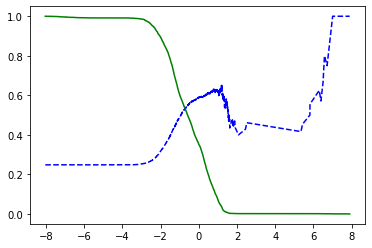

In [41]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# SGD Classifier

In [42]:
sgd_clf = joblib.load("Models/sgd_clf.pkl")

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.75369128, 0.76219239, 0.74228188])

In [44]:
y_train_sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [45]:
confusion_matrix(y_train, y_train_sgd_pred)

array([[8651, 1430],
       [1889, 1440]], dtype=int64)

In [46]:
f1_score(y_train, y_train_sgd_pred)

0.46459106307468945

In [48]:
y_sgd_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

In [49]:
sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(y_train, y_sgd_scores)

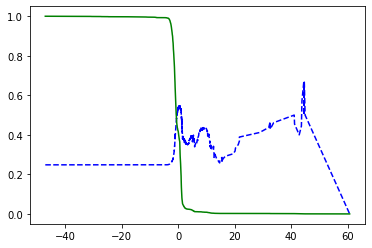

In [50]:
plot_precision_recall_vs_threshold(sgd_precisions, sgd_recalls, sgd_thresholds)

In [65]:
threshold_selected = thresholds[np.argmax(sgd_precisions >= 0.5)]

In [66]:
threshold_selected

-0.5758497111556721

In [67]:
y_sgd_train_pred_final = (y_sgd_scores >= threshold_selected)

In [68]:
f1_score(y_train, y_sgd_train_pred_final)

0.4762484774665043